## IMDB SCRAPING

In [1]:
# libraries used
import warnings
warnings.filterwarnings('ignore')
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
movie_name=[] # for storing movie names
movie_links=[] # for storing their IMDB links

In [3]:
bsobj = BeautifulSoup(urlopen('http://www.imdb.com/chart/top?ref_=nv_mv_250_6'))
a = bsobj.find('tbody', {'class':'lister-list'}).find_all('td', {'class':'titleColumn'})
for i in range(0,250):
    movie_links.append('https://www.imdb.com'+bsobj.find('tbody', {'class':'lister-list'}).find_all('td', {'class':'titleColumn'})[i].a.attrs['href'])
for links in a:
    movie_name.append(str(links.a.text))

In [4]:
movie_name

['The Shawshank Redemption',
 'The Godfather',
 'The Godfather: Part II',
 'The Dark Knight',
 '12 Angry Men',
 "Schindler's List",
 'Pulp Fiction',
 'The Lord of the Rings: The Return of the King',
 'Il buono, il brutto, il cattivo',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'Forrest Gump',
 'Star Wars: Episode V - The Empire Strikes Back',
 'Inception',
 'The Lord of the Rings: The Two Towers',
 "One Flew Over the Cuckoo's Nest",
 'Goodfellas',
 'The Matrix',
 'Shichinin no samurai',
 'Star Wars',
 'Cidade de Deus',
 'Se7en',
 'The Silence of the Lambs',
 "It's a Wonderful Life",
 'La vita è bella',
 'The Usual Suspects',
 'Léon',
 'Sen to Chihiro no kamikakushi',
 'Saving Private Ryan',
 'Interstellar',
 'American History X',
 'The Green Mile',
 'Once Upon a Time in the West',
 'Psycho',
 'City Lights',
 'Casablanca',
 'The Intouchables',
 'Modern Times',
 'The Pianist',
 'The Departed',
 'Raiders of the Lost Ark',
 'Terminator 2: Judgment Day',
 'Rear Wi

### Extraction of useful info

In [8]:
#imdb rating
bsobj0.find('span', {'itemprop':'ratingValue'}).text

'9.3'

In [38]:
#no. of user rarting
bsobj0.find('span', {'class':'small', 'itemprop':'ratingCount'}).text

'1,921,330'

In [39]:
#running time
bsobj0.find('div', {'class':'subtext'}).time.text.strip()

'2h 22min'

In [41]:
#bbfc rating
bsobj0.find('meta', {'itemprop':'contentRating'}).attrs['content']

'UA'

In [49]:
#release date
bsobj0.find('a', {'title':'See more release dates'}).text.strip()

'14 October 1994 (USA)'

In [68]:
#director
bsobj0.find_all('div', {'class':'credit_summary_item'})[0].a.text

'Frank Darabont'

In [67]:
# writers
for i in range(len(bsobj0.find_all('div', {'class':'credit_summary_item'})[1].find_all('a'))):
    print(bsobj0.find_all('div', {'class':'credit_summary_item'})[1].find_all('a')[i].text)

Stephen King
Frank Darabont


In [76]:
#cast
for i in range(len(bsobj0.find_all('div', {'class':'credit_summary_item'})[2].find_all('a'))-1):
    print(bsobj0.find_all('div', {'class':'credit_summary_item'})[2].find_all('a')[i].text)

Tim Robbins
Morgan Freeman
Bob Gunton


In [79]:
# metascore
bsobj0.find('div', {'class':'metacriticScore score_favorable titleReviewBarSubItem'}).text.strip()

'80'

In [88]:
#storyline
bsobj0.find('div', {'class':'inline canwrap', 'itemprop':'description'}).p.text.split('Written')[0].strip()

"Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red."

In [107]:
#country
for i in range(len(bsobj0.find('div', {'class':'article', 'id':'titleDetails'}).find_all('div')[1].find_all('a'))):
    print(bsobj0.find('div', {'class':'article', 'id':'titleDetails'}).find_all('div')[1].find_all('a')[i].text)

USA


In [17]:
# language
#for i in range(len(bsobj0.find('div', {'class':'article', 'id':'titleDetails'}).find_all('div')[2].find('a')))
a = bsobj0.find('div', {'class':'article', 'id':'titleDetails'}).find_all('div')[2].find('a').text
a

'English'

In [41]:
imdb=[]      # IMDB rating
no_user=[]   # No. of users who had given ratings
run_time=[]  # Running time of the movie
bbfc=[]      # BBFC rating (UA/A/R)
rel_date=[]  # Release Date
dirct=[]     # Diector
met=[]       # Metascore
summary=[]   # Summary
country=[]   # Country
lang=[]      # Language

In [87]:
# Scraping of useful info

def getlinks(links):
    bsobj0 = BeautifulSoup(urlopen(links))
    imdb.append(bsobj0.find('span', {'itemprop':'ratingValue'}).text) #imdb rating
    #no_user.append(bsobj0.find('span', {'class':'small', 'itemprop':'ratingCount'}).text) #no. of user rating
    summary.append(bsobj0.find('div', {'class':'inline canwrap', 'itemprop':'description'}).p.text.split('Written')[0].strip())
    lang.append(bsobj0.find('div', {'class':'article', 'id':'titleDetails'}).find_all('div')[2].find('a').text)
    country.append(bsobj0.find('div', {'class':'article', 'id':'titleDetails'}).find_all('div')[1].find('a').text)
    run_time.append(bsobj0.find('div', {'class':'subtext'}).time.text.strip()) # running time
    #try:
    #    bbfc.append(bsobj0.find('meta', {'itemprop':'contentRating'}).attrs['content']) #bbfc rating
    #except AttributeError:
    #    bbfc.append(np.nan)
    rel_date.append(bsobj0.find('a', {'title':'See more release dates'}).text.strip()) #release date
    dirct.append(bsobj0.find_all('div', {'class':'credit_summary_item'})[0].a.text) #director
    #try:
    #    met.append(bsobj0.find('div', {'class':'metacriticScore score_favorable titleReviewBarSubItem'}).text.strip()) #metascore
    #except AttributeError:
    #    met.append(np.nan)
for i in range(100,250):
    getlinks(movie_links[i])

In [199]:
# creating the data frame 
movie_list = pd.DataFrame({'Movie Name':movie_name[0:250], 'Director':dirct, 'Release Date':rel_date, 'Running Time':run_time, 'Country':country, 'Language':lang, 'IMDB Rating':imdb})

In [200]:
movie_list

,Country,Director,IMDB Rating,Language,Movie Name,Release Date,Running Time
0,USA,Frank Darabont,9.3,English,The Shawshank Redemption,14 October 1994 (USA),2h 22min
1,USA,Francis Ford Coppola,9.2,English,The Godfather,24 March 1972 (USA),2h 55min
2,USA,Francis Ford Coppola,9.0,English,The Godfather: Part II,20 December 1974 (USA),3h 22min
3,USA,Christopher Nolan,9.0,English,The Dark Knight,18 July 2008 (India),2h 32min
4,USA,Sidney Lumet,8.9,English,12 Angry Men,April 1957 (USA),1h 36min
5,USA,Steven Spielberg,8.9,English,Schindler's List,4 February 1994 (USA),3h 15min
6,USA,Quentin Tarantino,8.9,English,Pulp Fiction,14 October 1994 (USA),2h 34min
7,USA,Peter Jackson,8.9,English,The Lord of the Rings: The Return of the King,6 February 2004 (India),3h 21min
8,Italian,Sergio Leone,8.9,See more,"Il buono, il brutto, il cattivo",23 December 1966 (Italy),2h 41min
9,USA,David Fincher,8.8,English,Fight Club,15 October 1999 (USA),2h 19min


In [201]:
# ordering of columns as per my choice

movie_list =movie_list[['Movie Name', 'Director', 'Country', 'Language', 'Release Date', 'Running Time', 'IMDB Rating']]

In [202]:
# indexing the dataframe

movie_list.index = list(range(1,251))

In [203]:
movie_list

,Movie Name,Director,Country,Language,Release Date,Running Time,IMDB Rating
1,The Shawshank Redemption,Frank Darabont,USA,English,14 October 1994 (USA),2h 22min,9.3
2,The Godfather,Francis Ford Coppola,USA,English,24 March 1972 (USA),2h 55min,9.2
3,The Godfather: Part II,Francis Ford Coppola,USA,English,20 December 1974 (USA),3h 22min,9.0
4,The Dark Knight,Christopher Nolan,USA,English,18 July 2008 (India),2h 32min,9.0
5,12 Angry Men,Sidney Lumet,USA,English,April 1957 (USA),1h 36min,8.9
6,Schindler's List,Steven Spielberg,USA,English,4 February 1994 (USA),3h 15min,8.9
7,Pulp Fiction,Quentin Tarantino,USA,English,14 October 1994 (USA),2h 34min,8.9
8,The Lord of the Rings: The Return of the King,Peter Jackson,USA,English,6 February 2004 (India),3h 21min,8.9
9,"Il buono, il brutto, il cattivo",Sergio Leone,Italian,See more,23 December 1966 (Italy),2h 41min,8.9
10,Fight Club,David Fincher,USA,English,15 October 1999 (USA),2h 19min,8.8


Some of the values of Language column are set as 'See more' which is not a language. On seeing the dataframe, I noticed their language data is present in the Country column. So following are the steps to correct the wrong information.

In [204]:
ind = movie_list.loc[movie_list['Language']=='See more'].index

In [205]:
ind

Int64Index([  9,  16,  19,  24,  27,  33,  34,  35,  38,  43,  52,  55,  57,
             59,  66,  69,  72,  73,  78,  80,  84,  90,  92,  93,  95,  97,
             99, 103, 104, 105, 107, 110, 112, 114, 116, 119, 123, 124, 125,
            126, 127, 129, 133, 134, 136, 138, 141, 145, 146, 147, 151, 152,
            154, 159, 161, 163, 166, 167, 168, 169, 170, 171, 173, 174, 177,
            181, 182, 184, 185, 187, 189, 191, 194, 195, 196, 198, 201, 208,
            209, 211, 215, 216, 219, 220, 222, 223, 225, 226, 227, 229, 235,
            238, 242, 247, 248, 249],
           dtype='int64')

In [206]:
for i in ind:
    movie_list.ix[i,3] = movie_list.ix[i,2]

Also, some of the countries value are set as their language. Correcting them by following steps.

In [208]:
movie_list.Country.unique()

array(['USA', 'Italian', 'New Zealand', 'English', 'Japanese', 'Brazil',
       'Italy', 'Japan', 'France', 'UK', 'Germany', 'South Korea',
       'West Germany', 'India', 'German', 'Hindi', 'Denmark', 'Iran',
       'Turkey', 'Spain', 'Canada', 'Argentina', 'Swedish', 'Ireland',
       'Belarusian', 'Russian', 'Turkish', 'Australia', 'French', 'Korean',
       'Mexico', 'Hong Kong'], dtype=object)

In [209]:
correct = {'Japanese':'Japan','Italian':'Italy','English':'USA','Hindi':'India','German':'Germany','French':'France', 'Swedish':'Sweden', 'Belarusian':'Soviet Union', 'Russian':'Russia', 'Turkish':'Turkey', 'Korean':'South Korea'}

In [210]:
for i in range(1,251):
    if movie_list['Country'].ix[i] in correct.keys():
        movie_list['Country'].ix[i] = correct[movie_list['Country'].ix[i]]

In [211]:
movie_list

,Movie Name,Director,Country,Language,Release Date,Running Time,IMDB Rating
1,The Shawshank Redemption,Frank Darabont,USA,English,14 October 1994 (USA),2h 22min,9.3
2,The Godfather,Francis Ford Coppola,USA,English,24 March 1972 (USA),2h 55min,9.2
3,The Godfather: Part II,Francis Ford Coppola,USA,English,20 December 1974 (USA),3h 22min,9.0
4,The Dark Knight,Christopher Nolan,USA,English,18 July 2008 (India),2h 32min,9.0
5,12 Angry Men,Sidney Lumet,USA,English,April 1957 (USA),1h 36min,8.9
6,Schindler's List,Steven Spielberg,USA,English,4 February 1994 (USA),3h 15min,8.9
7,Pulp Fiction,Quentin Tarantino,USA,English,14 October 1994 (USA),2h 34min,8.9
8,The Lord of the Rings: The Return of the King,Peter Jackson,USA,English,6 February 2004 (India),3h 21min,8.9
9,"Il buono, il brutto, il cattivo",Sergio Leone,Italy,Italian,23 December 1966 (Italy),2h 41min,8.9
10,Fight Club,David Fincher,USA,English,15 October 1999 (USA),2h 19min,8.8


In [212]:
movie_list['Country'].unique()

array(['USA', 'Italy', 'New Zealand', 'Japan', 'Brazil', 'France', 'UK',
       'Germany', 'South Korea', 'West Germany', 'India', 'Denmark',
       'Iran', 'Turkey', 'Spain', 'Canada', 'Argentina', 'Sweden',
       'Ireland', 'Soviet Union', 'Russia', 'Australia', 'Mexico',
       'Hong Kong'], dtype=object)

In [220]:
#removing the country name from the Release Date column

movie_list['Release Date'] = movie_list['Release Date'].apply(lambda x: x.split('(')[0] )

In [221]:
movie_list

,Movie Name,Director,Country,Language,Release Date,Running Time,IMDB Rating
1,The Shawshank Redemption,Frank Darabont,USA,English,14 October 1994,2h 22min,9.3
2,The Godfather,Francis Ford Coppola,USA,English,24 March 1972,2h 55min,9.2
3,The Godfather: Part II,Francis Ford Coppola,USA,English,20 December 1974,3h 22min,9.0
4,The Dark Knight,Christopher Nolan,USA,English,18 July 2008,2h 32min,9.0
5,12 Angry Men,Sidney Lumet,USA,English,April 1957,1h 36min,8.9
6,Schindler's List,Steven Spielberg,USA,English,4 February 1994,3h 15min,8.9
7,Pulp Fiction,Quentin Tarantino,USA,English,14 October 1994,2h 34min,8.9
8,The Lord of the Rings: The Return of the King,Peter Jackson,USA,English,6 February 2004,3h 21min,8.9
9,"Il buono, il brutto, il cattivo",Sergio Leone,Italy,Italian,23 December 1966,2h 41min,8.9
10,Fight Club,David Fincher,USA,English,15 October 1999,2h 19min,8.8


In [223]:
# changing the data type of the values of IMDB Rating from str to float

movie_list['IMDB Rating'] = movie_list['IMDB Rating'].apply(lambda x: float(x))

In [288]:
# changing the Running time data into total minutes

def func(x):
    a = int(x.split('h')[0])*60 
    b = x.split('h')[1].split('min')[0].strip()
    if b=='':
        b=0
    else:
        b = int(x.split('h')[1].split('min')[0].strip())
    return(a+b)
movie_list['Running Time'] = movie_list['Running Time'].apply(func)

In [302]:
# Adding a new column 'Release Year' showing the their year of release

yearregex = re.compile('\d\d\d\d')
def func(x):
    result = yearregex.search(x)
    return(result.group())
movie_list['Release Year'] = movie_list['Release Date'].apply(func)

In [306]:
movie_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 1 to 250
Data columns (total 8 columns):
Movie Name      250 non-null object
Director        250 non-null object
Country         250 non-null object
Language        250 non-null object
Release Date    250 non-null object
Running Time    250 non-null int64
IMDB Rating     250 non-null float64
Release Year    250 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 27.6+ KB


### Some Visualizations

In [308]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

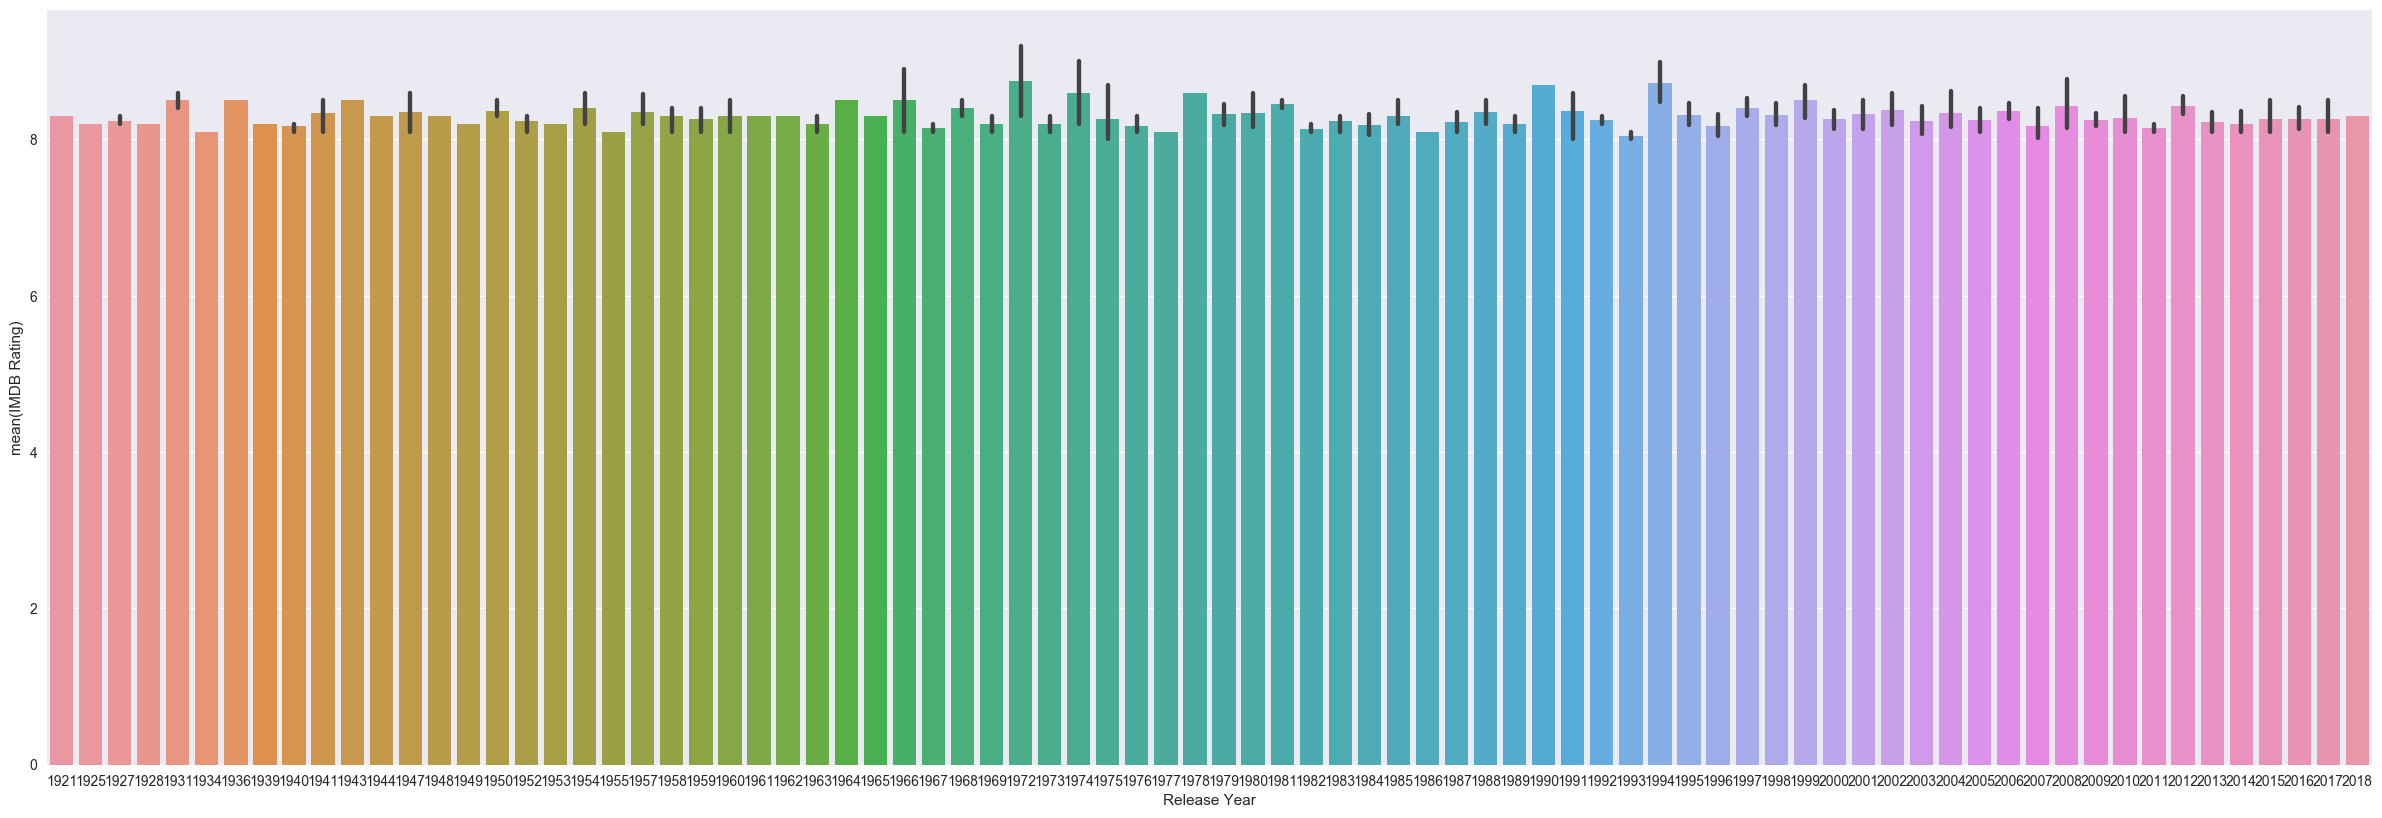

In [317]:
plt.figure(figsize=[30,10], dpi=100)
sns.barplot(x='Release Year', y='IMDB Rating', data=movie_list)

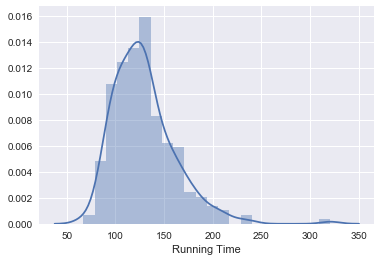

In [319]:
sns.distplot(movie_list['Running Time'])

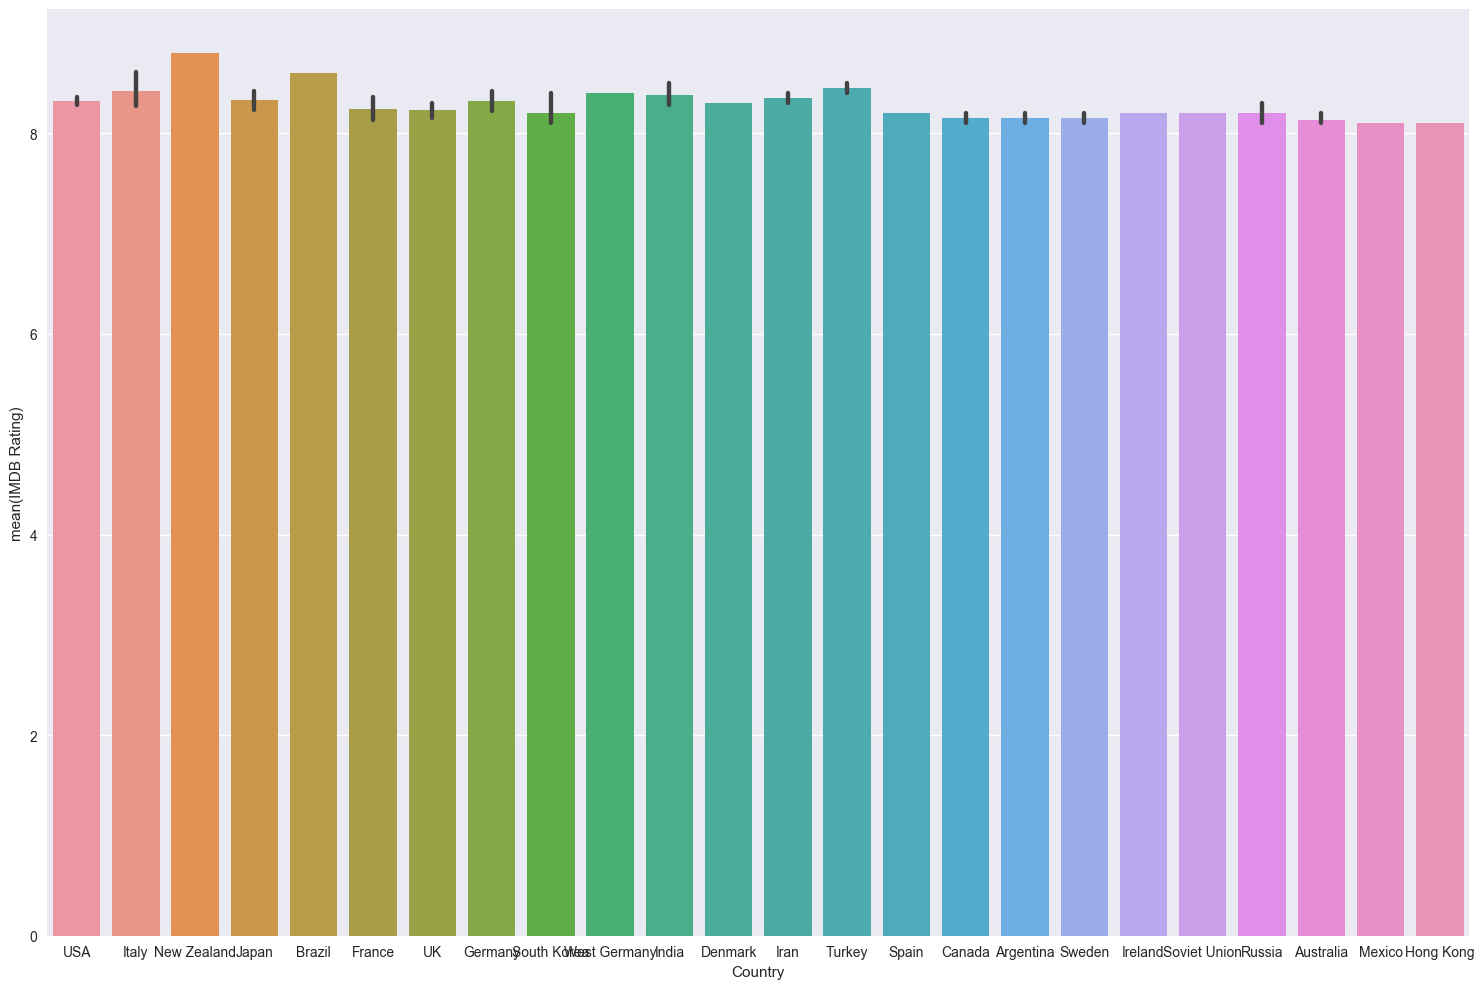

In [324]:
plt.figure(figsize=[15,10], dpi=100)
sns.barplot(x='Country', y='IMDB Rating', data=movie_list)
plt.tight_layout()

### Writing the dataframe into csv fromat

In [326]:
movie_list.to_csv('akash.csv')